<a href="https://colab.research.google.com/github/syeadn2001/data_analytics_2/blob/main/hospitalDiabeticPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

I got this data set from "UCI: Machine Learning Repository", specifically https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008# . To be completely honest, I searched up ML datasets for beginners and this dataset popped up.

This dataset has diabetic patient data for approximately 10 years. Each row represents an instance of the data(an individual patient) and the features give specific descriptions of the patient. This dataset has nearly 50 features, including race, gender, age, etc. 

The goal of this project is to see if I can create a model that would if a patient would be diabetic without knowing their medications. I would have two classes, the positive case being the patient being diabetic and the negative case being the patient was not diabetic. 

*I mention the data preparation under Data Preparation Section*


In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#Importing the file
location = 'https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv'

df = pd.read_csv(location)


#**Overview**


In [ ]:
df
#viewing the dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.tail()
#viewing the last 5 instances

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [ ]:
df.describe()
#viewing basic statistics of the dataset, including mean and percentiles
#categorical attributes are not included because they cant be numerically tested

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.shape
#viewing the shape of the array (50 features & 101766 instances[patients])

(101766, 50)

In [ ]:
#Replacing all unknown data with null values
df.replace("?", np.nan, inplace=True )
df.replace("Unknown/Invalid", np.nan, inplace=True )
#These columns are a range of numbers, each number indicating a different 
#characterstic of the feature. The numbers I replace are the ones that
#are stated to be NaN
df['admission_type_id'].replace(6,np.nan,inplace=True)
df['discharge_disposition_id'].replace(18, np.nan, inplace=True)
df['admission_source_id'].replace(17, np.nan, inplace=True)

In [ ]:
df.isnull().sum()
#viewing the sum of null values for each feature.
#none of the drugs have null values. 

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id            5291
discharge_disposition_id     3691
admission_source_id          6781
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

#**Data Exploration**

##Checking distribution of categories

In [ ]:
df['gender'].value_counts()
#more females than males

Female    54708
Male      47055
Name: gender, dtype: int64

In [ ]:
df['race'].value_counts()
#This dataset is primarily representative of Caucausians

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [ ]:
df['age'].value_counts()
#This dataset is primarilly concerned with seniors, probably because
#people tend to show diabetic symptoms at an older age

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

##Gender & Number of Medications

In [ ]:
df1 = df[['gender','num_medications']]
df1.groupby(['gender']).sum()
#This shows that females have a higher number of medications compared to males, 
#but that might also be a result of more females in the dataset compared to 
#males

,num_medications
gender,
Female,885607
Male,744823


In [ ]:
df1.groupby(['gender']).mean()  
#average number of medications taken by each gender

,num_medications
gender,
Female,16.187888
Male,15.828775


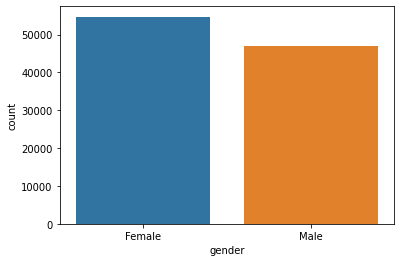

In [ ]:
#Visualizing the difference in num of medications between males and females    
sns.countplot(x=df1['gender'], data=df1)

##Diabetes & Demographics

In [4]:
#Encoding diabetesMed into numerical equivalents so it can be 
#processed into meaningful graphs and models
df.loc[:, 'diabetesMed'] = df.loc[:, 'diabetesMed'].replace(
    {
        'No': 0,
       'Yes': 1
    }
)

TypeError: ignored

In [5]:
#Diabetes Medication in relation to age, gender, and race
df2 = df[['diabetesMed','age','gender','race']]
df2

,diabetesMed,age,gender,race
0,0,[0-10),Female,Caucasian
1,1,[10-20),Female,Caucasian
2,1,[20-30),Female,AfricanAmerican
3,1,[30-40),Male,Caucasian
4,1,[40-50),Male,Caucasian
...,...,...,...,...
101761,1,[70-80),Male,AfricanAmerican
101762,1,[80-90),Female,AfricanAmerican
101763,1,[70-80),Male,Caucasian
101764,1,[80-90),Female,Caucasian


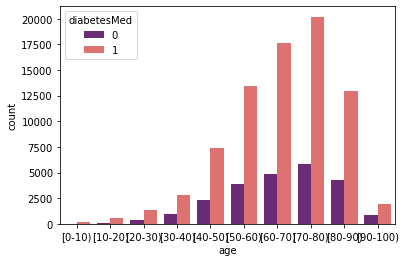

In [6]:
#Diabetes Medication in relation to age
#This shows that people who are older tend to take more diabetes medication
sns.countplot(x='age', data=df2, hue='diabetesMed', palette='magma')

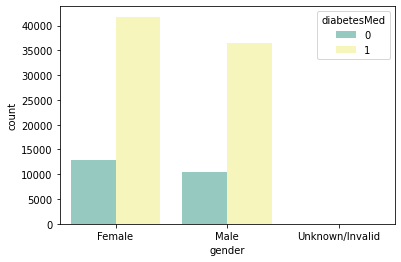

In [7]:
#Females take more diabetes medication than males, but that might be due to 
#the higher number of females than males in the data
sns.countplot(x='gender', data=df2, hue='diabetesMed', palette='Set3')

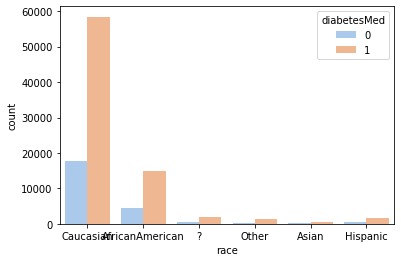

In [9]:
#Caucasions have more diabetes medication compared to other races, but that may
#be due to the fact that there are more caucasion patients than other patients, 
#overall still Caucasians looks to be more affected
sns.countplot(x='race', data=df2, hue='diabetesMed', palette='pastel')

#**Data Preparation (Wrangling/Cleaning)**

In order to properly prepare my data so I can create a model that can accomplish my goal was to:

1. Drop all columns to predict a patient's being diabetic or not (which isn't based off their medical drugs!).
2. Want to transform categorical features that cannot be properly processed into the model to numerical features.
3. Want to drop null values so they do not corrupt the models

In [ ]:
#Dropping all unneccesary columns
df.drop(['patient_nbr','encounter_id','weight','payer_code','medical_specialty','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
                     'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','max_glu_serum','A1Cresult',
                     'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','diag_1','diag_2','diag_3',
                     'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','insulin'],axis=1, inplace=True)

In [ ]:
#changing all non-numeric columns to numerics so we can process it in the model
#have to be inplace so the replacement sticks
df.race.replace({'Caucasian':1,'AfricanAmerican':2, 'Hispanic':3, 'Asian':4,'Other':5, np.nan:0},inplace=True)
df.gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.readmitted.replace({'NO': 0, '>30': 0, '<30': 1}, inplace=True)
df.age.replace({ '[0-10)':0, '[10-20)':0, '[20-30)':0, '[30-40)':1, '[40-50)':1, '[50-60)':1, '[60-70)':2, '[70-80)':2, '[80-90)':2, '[90-100)':2}, inplace=True)
df.change.replace({'No':0,'Ch':1},inplace=True)

In [ ]:
df
#can now see that the categorical columns have been converted to numerical c
#counterparts.

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,1,0.0,0,NaN,25.0,1.0,1,41,0,1,0,0,0,1,0,No,0
1,1,0.0,0,1.0,1.0,7.0,3,59,0,18,0,0,0,9,1,Yes,0
2,2,0.0,0,1.0,1.0,7.0,2,11,5,13,2,0,1,6,0,Yes,0
3,1,1.0,1,1.0,1.0,7.0,2,44,1,16,0,0,0,7,1,Yes,0
4,1,1.0,1,1.0,1.0,7.0,1,51,0,8,0,0,0,5,1,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,2,1.0,2,1.0,3.0,7.0,3,51,0,16,0,0,0,9,1,Yes,0
101762,2,0.0,2,1.0,4.0,5.0,5,33,3,18,0,0,1,9,0,Yes,0
101763,1,1.0,2,1.0,1.0,7.0,1,53,0,9,1,0,0,13,1,Yes,0
101764,1,0.0,2,2.0,3.0,7.0,10,45,2,21,0,0,1,9,1,Yes,0


In [ ]:
df.isnull().sum()
#still have to deal with null values from remaining columns

race                           0
gender                         3
age                            0
admission_type_id           5291
discharge_disposition_id    3691
admission_source_id         6781
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int64

Text(0.5, 1.0, 'NaN Data')

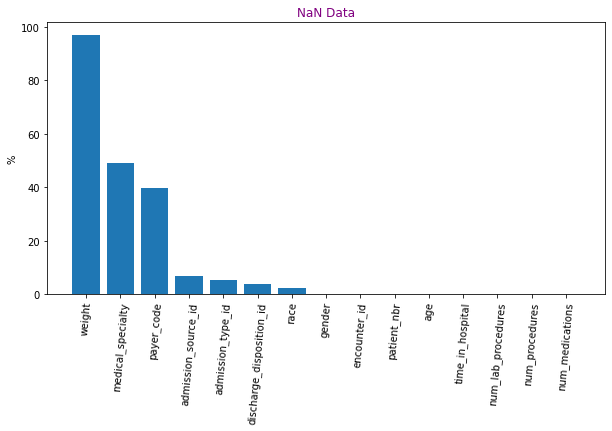

In [ ]:
plt.figure(figsize=(10, 5))
missing = pd.DataFrame({'column':df.iloc[:, :-35].columns, 'na_percent':df.iloc[:, :-35].isnull().sum()/len(df)*100})
missing.sort_values('na_percent', ascending=False, inplace=True)
plt.bar(missing['column'], missing['na_percent'])
plt.ylabel('%')
plt.xticks(rotation=85)
plt.title('NaN Data', color="purple")

In [ ]:
#decided to drop all null values becuase they are insignificant because 
#we have alot of data left
df.dropna(inplace=True)

In [ ]:
df['diabetesMed'].value_counts()
#Can see the distinct values of the target column
#More positive cases than negative

Yes    69268
No     19701
Name: diabetesMed, dtype: int64

#**Models**

In [ ]:
from sklearn.model_selection import train_test_split
#importing module that will split our data to training and testing sets
from sklearn.metrics import classification_report, confusion_matrix
#importing modules that will measure our classification models' performances
from sklearn import metrics
#importing another module that will measure our models
y = df['diabetesMed']
#setting our target feature 
X= df.drop('diabetesMed', axis=1)
#setting all other features to be processed by our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#splitting the data into 4 arrays, two for training and two for testing

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#looking at the dimensions of all arrays

((71175, 16), (17794, 16), (71175,), (17794,))

##Logistic Regression Model

Logistics Regression calculates a weighted sum of the input features( in this case, the features such as race,gender, etc.) and outputs a **logistic** of the the result. These outputs are traced out in a sigmoid function w/ a range of [0,1]. If the output is greater than 0.5, than the instance would be a positive case. If the output is less than 0.5, it would be considered a negative class.

In [ ]:
# Import LogisticRegression from sklearn's linear_model
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression as log
log = LogisticRegression(solver='liblinear',random_state=88)

In [ ]:
log.fit(X_train, y_train)
#training the model in the correspodning training sets

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=88, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

###RMSE Score

In [ ]:
logPredict = log.predict(X_test)
#prediction array based off the test array(haven't seen during training)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, logPredict))
#comparing the predictions with the actual values

Accuracy: 0.7888052152410925


This method from the metrics module uses RMSE performance measure as an undrlying algorithm, which isn't optimal for classification.

###Classification Report/Confusion Matrix

In [ ]:
print(classification_report(y_test,logPredict))
#printing a classification report comparing the actual target values
#with the predicted values. Prints out Precision, Recall, f1-scores, 
#and support scores.


              precision    recall  f1-score   support

          No       0.57      0.17      0.26      3922
         Yes       0.80      0.96      0.88     13872

    accuracy                           0.79     17794
   macro avg       0.69      0.57      0.57     17794
weighted avg       0.75      0.79      0.74     17794



The No/negative cases represent the patients that are not diabetic, while the Yes/positive cases are the patients that are. This model seems to be able to detect postive cases quite accurately, with both high recall and high precision (able to predict most of the positive cases correctly, and the the correct predictions are frequently on target). Yet with the negative cases, the model seems quite bad in both regards, especially with catching all negative cases (can only catch 17 percent!). I don't really know why, so I am going to create a a Confusion Matrix to see the acutal and predict classes.

In [ ]:
print(confusion_matrix(y_test, logPredict))
#prints a confusion matrix, a perfomance measure between the predicted values
#and actual values. Shows true positives, true negatives, and type 1/2 errors.

[[  658  3264]
 [  494 13378]]


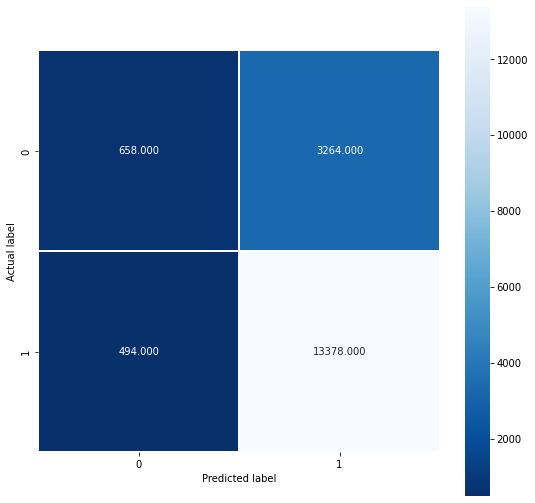

In [ ]:
#COPIED FROM BOOK
plt.figure(figsize=(9,9)) #creating a 9
sns.heatmap(confusion_matrix(y_test, logPredict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

###ROC CURVE

In [ ]:
from sklearn.metrics import precision_recall_curve
#importing another performance measure to test the model

pr_y_test = y_test.replace({'No':0, 'Yes':1 })

pr_logPredict = np.arange(logPredict.size)
counter = 0;
for i in logPredict:
  if i=='Yes':
    pr_logPredict[counter]=1
  else:
    pr_logPredict[counter]=0
  counter+=1

#have to change test and predicted arrays from categorical values to numerical
#values so they can be processed by the module.

In [ ]:
from sklearn.metrics import roc_curve
#creating necessary axis vectors from pre-processed target/predicted values 
fpr, tpr, thresholds = roc_curve(pr_y_test, pr_logPredict)

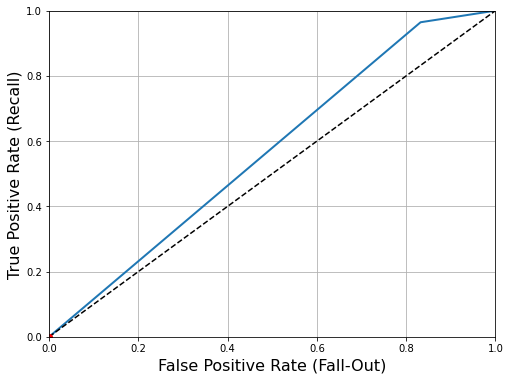

In [ ]:
#COPIED FROM BOOK
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                           

plt.figure(figsize=(8, 6))                                   
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
plt.show()

Based off the confusion matrix and the ROC curve, we can see that this classifier is not good, despite what the RMSE score tells us. The Confusion Matrix and Classification Report tells us how even though our classifier is skilled at prediciting at positive cases, out ROC curve shows us how our classifier is much closer to a completely random classifier. Our model probably classifies most of the instances as positive, and for that reason our positive rate are high and are negative rates for both precision and recall are low. 

##KNN Model



KNeighborsClassifier is an algorithm that relies on the hypothesis that similar data points are close together/clustered. The pros of this algorithm are that there are not several hyperparameters one has to be concerned with when training the model and that it is versatile. Yet the model becomes exteremely slow when the neighbors hyperparameter is set to a high value or if the dataset is extremely large. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Importing the model

Trying to see which neighbors hyperparameter is best by evaluating the accuracy of the model based on incrementing neighbors parameter. Seems that higher the neigbors mean more accuracy for this dataset. 

[0.7079352590760931, 0.7639091828706306, 0.7766662920085422, 0.780824997190064, 0.7843093177475553]




Text(0, 0.5, 'Testing Accuracy')

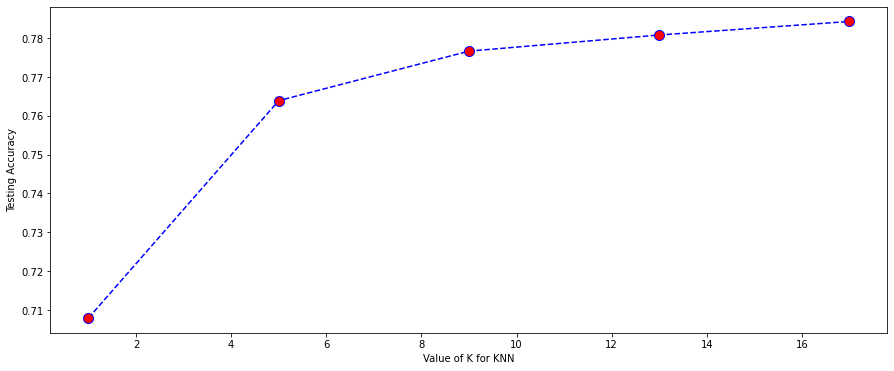

In [ ]:
#TRYING TO FIGURE OUT BEST HYPERPARAMETER
score =[]

# Run for i from 1 to 39
# Passing the value of i to KNeighborsClassifier
# and calculating the accuracy score and appending it into score array

#create 5 KNN models, with different n_neighbors values to see which 
#hyperparameter is best

for i in range(1,20,4):
  #instantiating model
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))
  #append() appends a passed obj (matrics.accuracy) into the existing list.
  #(score)

#plotting these scores into a graph to visuallu see which is the best 
#hyperparameter for the model
plt.figure(figsize=(15,6))
plt.plot(range(1,20,4),score, color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

###RMSE SCORE

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.7820051702821176


###Classification Report/Confusion Matrix
Code similar to previous model so didn't comment

In [ ]:
print(classification_report(y_test,knn_pred))


              precision    recall  f1-score   support

          No       0.48      0.17      0.25      3922
         Yes       0.80      0.95      0.87     13872

    accuracy                           0.78     17794
   macro avg       0.64      0.56      0.56     17794
weighted avg       0.73      0.78      0.73     17794



In [ ]:
print(confusion_matrix(y_test, knn_pred))


[[  672  3250]
 [  724 13148]]


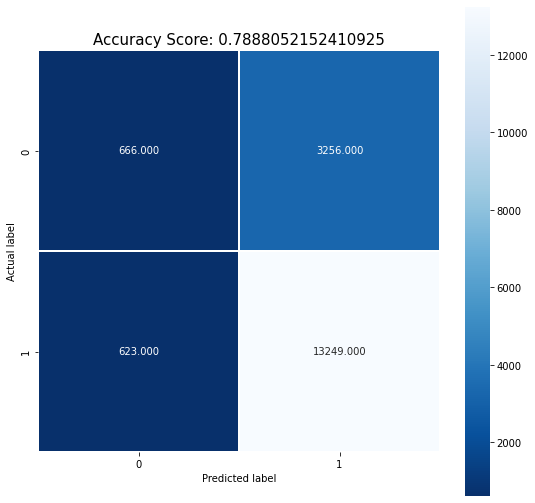

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

###ROC CURVE

In [ ]:
from sklearn.metrics import precision_recall_curve
pr_y_test = y_test.replace({'No':0, 'Yes':1 })
pr_knnPredict = np.arange(knn_pred.size)
counter = 0;
for i in knn_pred:
  if i=='Yes':
    pr_knnPredict[counter]=1
  else:
    pr_knnPredict[counter]=0
  counter+=1

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(pr_y_test, pr_knnPredict)

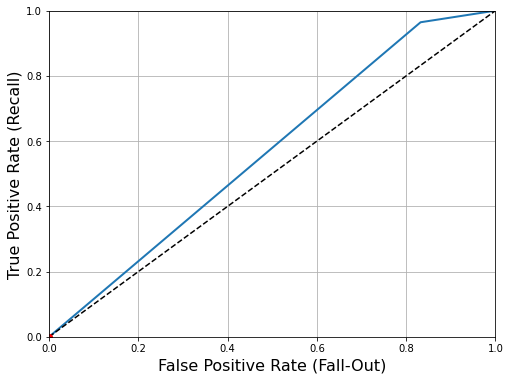

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
plt.show()

These measurement score are quite similar to the previous model. It seems that either some more data cleaning/preparation should be done or more data is required to make proper predictions. I will use one more classifier to see if it makes better predictions. 

##Decision Tree Model

The Decision Tree model is an algorithm based on nodes and conditionals.  The conditions are the model's main criterion in deciding which class the data point should be labeled to (the more conditions failes, the lower nodes the instance goes to). The model automatically decides which criterions are the most important after being trained by the data. 

There are multiple ways to split the data
The gini index, a simple criterion is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Provides the probability of you incorrecting labeling/classifying your sample data point when the condition for the node is incorrect. 

> if gini is 0, then the model definitely knows which class your data point has to be classified to. 

The sample starts with all the data points, and narrows down the further down you go down the tree b/c you are able to ignore data points that passed the condition of the previous node  

The further you go down the tree, the more, less critical, features you consider and evaluate to properly classify your data point.

###RMSE SCORE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.7565471507249635


###Classification Report/Confusion Matrix

In [ ]:
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

          No       0.44      0.46      0.45      3922
         Yes       0.85      0.84      0.84     13872

    accuracy                           0.75     17794
   macro avg       0.64      0.65      0.65     17794
weighted avg       0.76      0.75      0.76     17794



In [ ]:
print(confusion_matrix(y_test, predict))


[[ 1798  2124]
 [ 2251 11621]]


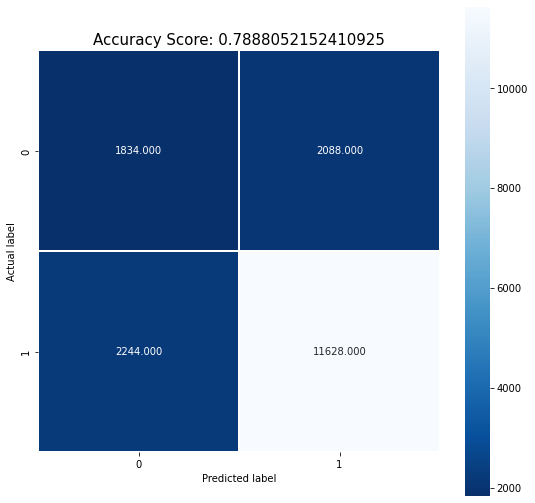

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

###ROC CURVE

In [ ]:
from sklearn.metrics import precision_recall_curve
pr_y_test = y_test.replace({'No':0, 'Yes':1 })
pr_DecPredict = np.arange(predict.size)
counter = 0;
for i in predict:
  if i=='Yes':
    pr_DecPredict[counter]=1
  else:
    pr_DecPredict[counter]=0
  counter+=1

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(pr_y_test, pr_DecPredict)

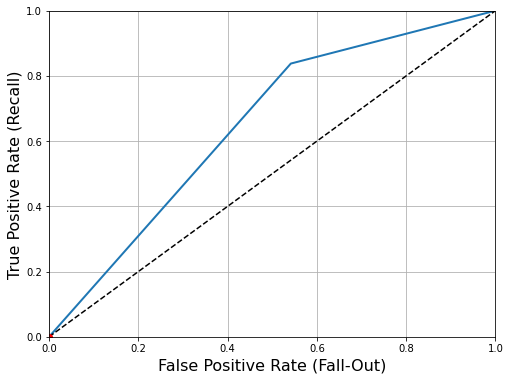

In [ ]:
#COPIED FROM BOOK
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                     
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
plt.plot([fpr_90], [recall_90_precision], "ro")               
plt.show()

Although the RMSE score for the decision tree model is slightly worse than the other models' scores, the ROC curve has a larger area under the curve, indicating that the model is better at predicting than the other models. The Confusion Matrix and Classification Report also indicate that the Decision Tree Classifier has better Recall and Precision Rates for the negative class, which was a detriment in the other classifiers.

#Conclusion

I create three models to process the features and classify a patient on whether or not they are diabetic or not. The underlying algorithms for the models were Logistic Regression, K Nearest Neigbors, and Decision Tree. Because this problem is a classification problem, a proper way to measure the performance of these algorithms are confusion matrices, PR(precision/recall) curves, and ROC curves. After cleaning the data, processing them into my model, measuring the performance of my models accordingly, I can conclude that the most accurate model was the Decision Tree based model. That is because its ROC curve and Confusion Matrix illustrated better overall results compared to its counterparts, having a better precision and recall score for the negative classes and having a ROC curve with a better area. 
    

This was an overall intensive yet fruitful experience. I learned alot about classification models and their respective performance measures. I also learned the mathematical understanding behind some of the ML algorithms. Some difficulties I faced during the development of this project was how to properly process and debug the features so they can be processed by the models. The Sci-Kit documentation helped with this because it illustrated what specific parameters the models required. 

#Citations
1. Class Textbook
2. Data Set: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#
3. "Data Science From Scratch" 
4. Sci-kit Documentation

#Extra
Showing the correlations between each feature

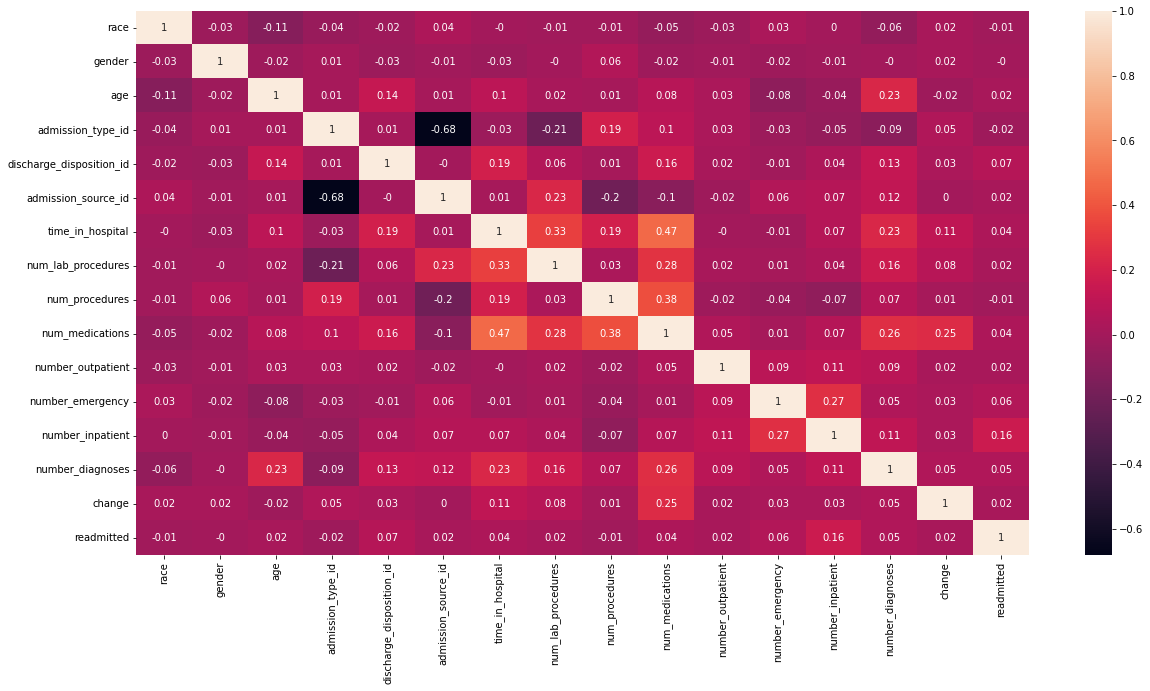

In [ ]:
correlation_matrix = df.corr().round(2)
#A correlation matrix is a table showing correlation coefficients between variables.

plt.figure(figsize=(20,10))

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix , annot = True )